---
# Cairo University Faculty of Engineering
## Machine Learning
## Assignment 5

---

Please write your full name here
- **Name** : Habiba Mohsen Ateya

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Part 1 Decision Tree


In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
tree_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

## Q1 Plot decision tree using export_graphviz

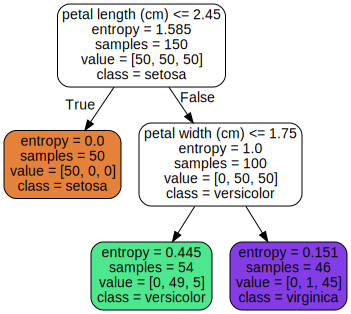

In [ ]:
from graphviz import Source
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)
with open("iris_tree.dot") as f:
    dot_graph = f.read()
Source(dot_graph)


## Q2 Plotting decision boundaries

Use the following function to plot the decision boundaries of DT from Q1

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

Plotting for max_depth = 2

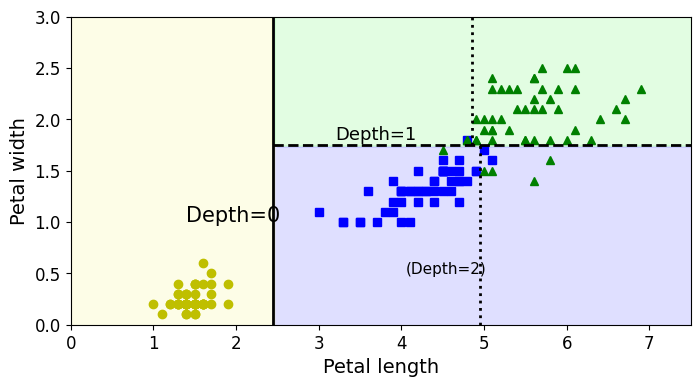

In [ ]:
plt.figure(figsize=(8, 4))

plot_decision_boundary(tree_clf, X, y)

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()

### Q2.1
- Train the decision tree using a maximum depth of 1.
- Plot the decision tree using graphviz
- Use the above function to plot the decision boundaries

**Question**
1. After plotting the resulting tree.
    - What's the output entropy in each block?
    - Comment on the entropy values in each block.
2. What's the difference in decision trees between using max_depth = 1, max_depth = 2, max_depth = 10? *Hint: Plot the tree in each case*

**Answer**
1. * At the root node, the entropy is 1.585, indicating some level of impurity or uncertainty in the distribution of classes. This suggests a logarithmic base other than 2 is used for entropy calculation, given that the value exceeds 1.
   * The entropy at the left node is 0, indicating perfect separation of the three classes based on the petal length feature. This means all instances in this node belong to the same class.
   * At the right node, the entropy is 1, indicating maximum uncertainty due to an equal split between two classes. This suggests the use of a binary measurement unit (bits) for information, as there are only two events to classify. Half of the instances have petal length greater than 2.45 and belong to one class, while the other half belong to the other class.

2.  max_depth = 1:

    *  This decision tree will be the simplest, as it can only make one split.
    *  It will likely use the feature that provides the best separation of classes with a single split.
    * The resulted tree will only have root node and two leaf nodes as demonstrated in the tree below.
    *  Underfitting is likely to occur.

    max_depth = 2:

    * This decision tree will be slightly more complex than the previous one, as it can make two splits.
    * It may consider additional features and create a deeper tree to better separate the classes.
    * The resulted tree will have root node, one internal node and three leaf nodes as demonstrated in the tree below.
    * this is the best choice as it gives a high accuracy and lower time complexity and memory consumption.

    max_depth = 10:

      * This decision tree will be the most complex, as it can make up to ten splits.
      * It will consider multiple features and create a deeper and more detailed tree structure.
      * The resulting tree will have multiple internal nodes and leaf nodes as demonsterated in the tree below, potentially resulting in overfitting if the dataset is not large enough.


In [ ]:
#  Q2.1 - Training the decision tree using max depth = 1 -
tree_clf_depth1 = DecisionTreeClassifier(max_depth=1, random_state=42, criterion='entropy')
tree_clf_depth1.fit(X, y)


DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=42)

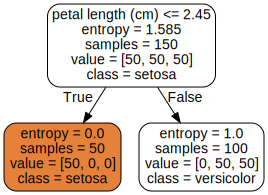

In [ ]:
#  Q2.1 - Plotting the decision tree using graphviz -
from graphviz import Source
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf_depth1,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)
with open("iris_tree.dot") as f:
    dot_graph = f.read()
Source(dot_graph)

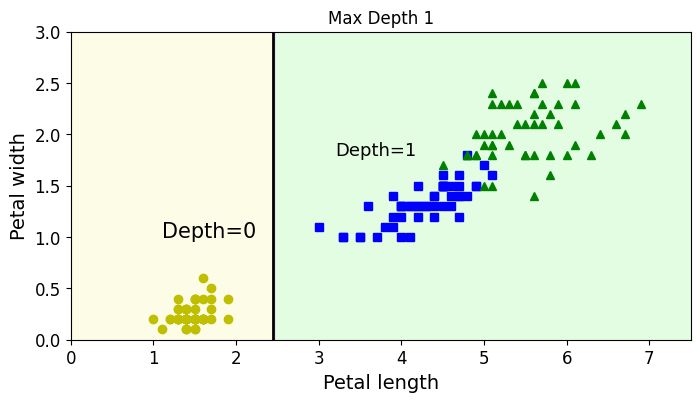

In [ ]:
#  Q2.1 - Plotting the decision boundary -

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_depth1, X, y)
plt.text(1.1, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.title("Max Depth 1")
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)




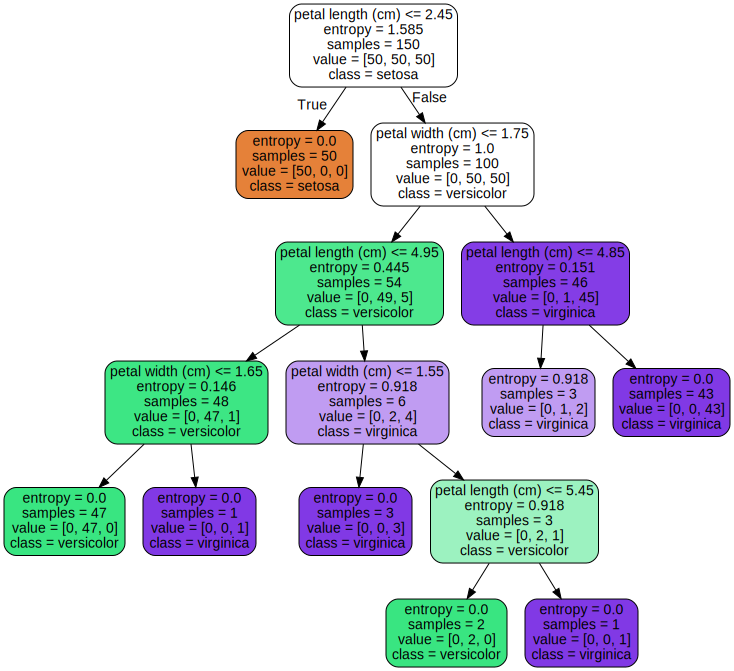

In [ ]:
# Plotting decision trees at depth 10

tree_clf_depth10 = DecisionTreeClassifier(max_depth=10, random_state=42, criterion='entropy')
tree_clf_depth10.fit(X, y)
export_graphviz(
    tree_clf_depth10,
    out_file="iris_tree10.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)
with open("iris_tree10.dot") as f:
    dot_graph = f.read()
Source(dot_graph)




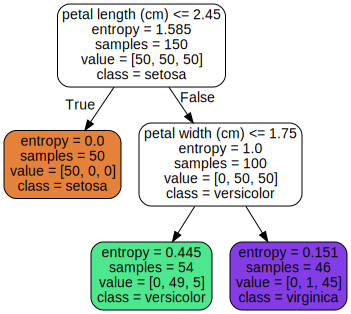

In [ ]:
# Plotting decision tree at depth 2
tree_clf_depth2 = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
tree_clf_depth2.fit(X, y)
export_graphviz(
    tree_clf_depth2,
    out_file="iris_tree2.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)
with open("iris_tree2.dot") as f:
    dot_graph = f.read()
Source(dot_graph)


### Q2.2

**Question**
1. Calculate probabilities of all classes on this data point X = [[5, 1.5]] using decision tree with max_depth = 2
2. Compare your result with "predict_proba" function.

**Answer**
1. First we check at the root node whether the petal length is less than 2.45 and since the petal length here is 5 so the condition is false we go to check the petal width if it's less than 1.75 at the internal node and since the condition is true we go to the final leaf node at the left.
so the probabilities are :
 * First Class Probability = 0/54= 0
 * Second Class Probability = 49/54 = 0.90740741
 * Third Class Probability =5/54 = 0.09259259

  These probabilities align precisely with the results obtained from the predict_proba function.

In [ ]:
predicted_probabilities_via_function = tree_clf.predict_proba([[5, 1.5]])

print("Predicted Probabilities (Via predict_proba function):", predicted_probabilities_via_function)

Predicted Probabilities (Via predict_proba function): [[0.         0.90740741 0.09259259]]


## Question 3 Sensitivity to data

### Q3.1 Decision Tree
**Question**
1. Fit a decision tree classifier max_depth = 2, to the original data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

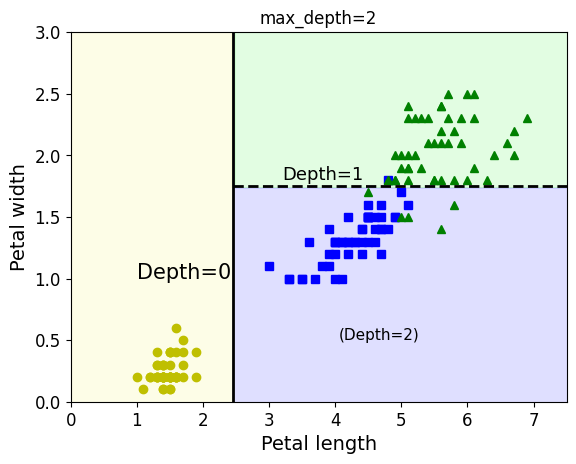

Classifier score on training data: 0.96


In [ ]:

# Training the model
tree_clf2=DecisionTreeClassifier(max_depth=2,random_state=42,criterion='entropy')
tree_clf2.fit(X,y)

# Plotting Decision Boundary
plt.title("max_depth=2")
plot_decision_boundary(tree_clf2,X,y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()

# Printing Accuracy
train_accuracy = tree_clf2.score(X,y)
print("Classifier score on training data:", train_accuracy)

The following cell rotates the data by angle **30**

In [ ]:
angle = np.pi / 180 * 30
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

**Question**
1. Fit another decision tree classifier max_depth = 2, to the rotated data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

Score on training data =  0.9733333333333334


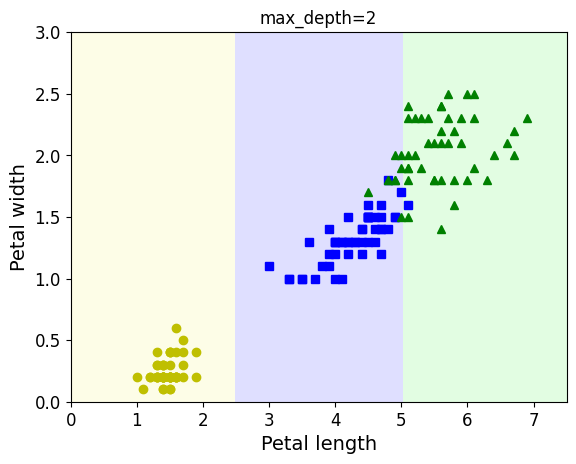

In [ ]:
# Training the model
tree_clf2_with_xr = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
tree_clf2_with_xr.fit(Xr,y)
# Plotting
plt.title("max_depth=2")
plot_decision_boundary(tree_clf2_with_xr,X,y)
# Printing Accuracy
print("Score on training data = ",tree_clf2_with_xr.score(Xr,y))


### Q3.2 Logistic Regression
The following function plots the decision boundaries for a logistic regression classifier

In [ ]:
import numpy as np
def plot_logistic_regression(clf, X, y, iris=True):

  x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
  h = 0.02  # step size in the mesh
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

  plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
  plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
  plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")

  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
  else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
  plt.legend(loc="lower right", fontsize=14)
  plt.show()

**Question**

1. Fit a logistic regression classifier to the original data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

Score on training data= 0.9666666666666667


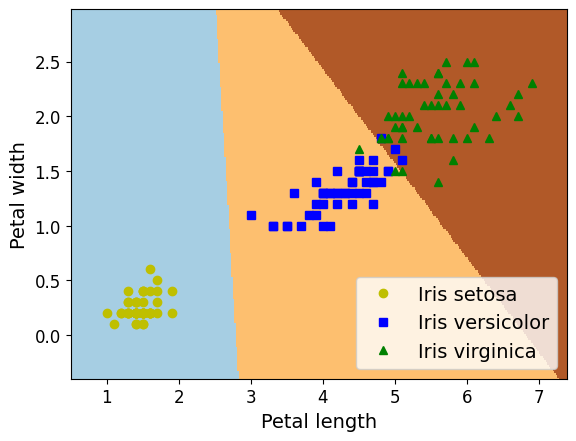

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_clf=LogisticRegression(random_state=42)
log_reg_clf.fit(X,y)
print("Score on training data=",log_reg_clf.score(X,y))

plot_logistic_regression(log_reg_clf,X,y)

**Question**
1. Fit another logistic regression classifier to the rotated data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

Score on training data= 0.9666666666666667


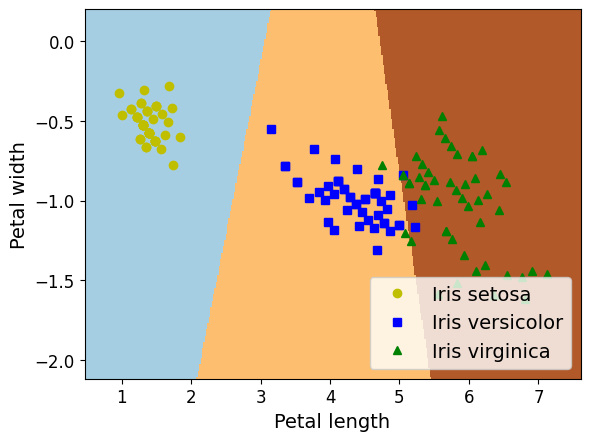

In [ ]:
log_reg_clf_2=LogisticRegression(random_state=42)
log_reg_clf_2.fit(Xr,y)
print("Score on training data=",log_reg_clf_2.score(Xr,y))

plot_logistic_regression(log_reg_clf_2,Xr,y)

### Q3.3
1. Comment on the differences between the logistic regression and decision trees classifiers scores to the original and rotated data
2. Explain why that happened?

**Answer**

1. The Decision Tree model resulted in higher accuracy when we rotated the data
but for the logistic regression model it gave the same accuracy with both original and rotated data

2. The reason behind this is that decision trees recursively partition the feature space into smaller regions with each split, resulting in non-linear decision boundaries. while logistic regression utilizes linear decision boundaries represented by straight lines. As a consequence, when the data is rotated, the decision boundaries of logistic regression models also rotate by the same angle, maintaining their linear nature. However, decision trees do not uniformly rotate their decision boundaries by the same angle as the data rotation due to the way splits are made at each node. Consequently, decision tree boundaries are affected by rotation, while logistic regression boundaries remain unchanged.

## Question 4 GridSearch

1. Generate a moons dataset using `make_moons(n_samples=10000, noise=0.35)`.

In [ ]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
X, y = make_moons(n_samples=10000, noise=0.4, random_state=0)

2. Split it into a training set and a test set using train_test_split().

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. Use grid search with cross-validation (with the help of the GridSearchCV class) to find best hyperparameter (max_depth, max_leaf_nodes, min_samples_split) values for a DecisionTreeClassifier.
    - Choose reasonable values for each hyperparameter.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [1, 2, 6, 8,10,12,14,16],
    'max_leaf_nodes': [2, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
dt_classifier = DecisionTreeClassifier()
grid_search = GridSearchCV(dt_classifier, param_grid,cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)



Best parameters: {'max_depth': 6, 'max_leaf_nodes': 15, 'min_samples_split': 2}


4. Train it on the full training set using the best hyperparameters, and measure your model's performance on the test set.

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.8675

## Question 4 Regression Tree

### Question
For the following plot of the two decision tree regressors:
1. Comment on the results
2. Which model has a higher variance error? why?
3. Which model has a higher bias error? why?

**Answer**

1. **Comment on the results:**
The decision tree regressor with max_depth=2 appears to underfit the data, as it oversimplifies the underlying pattern and fails to capture its complexity. On the other hand, the decision tree regressor with max_depth=5 overfits the data, as it tries to fit every detail, including outliers, leading to a more complex model that doesn't generalize well to new data.

2. The model with max_depth=5 has a higher variance error. This is because it tries too hard to fit the training data perfectly, resulting in predictions that are more spread out and farther away from each other. While these predictions might closely match the training data, they are likely to deviate significantly when applied to new, unseen data, indicating higher variance.

3. The model with max_depth=2 has a higher bias error. This is because it oversimplifies the underlying pattern of the data and fails to capture its complexity. The predictions from this model are closer together but farther from the actual data, indicating a systematic error in its predictions.

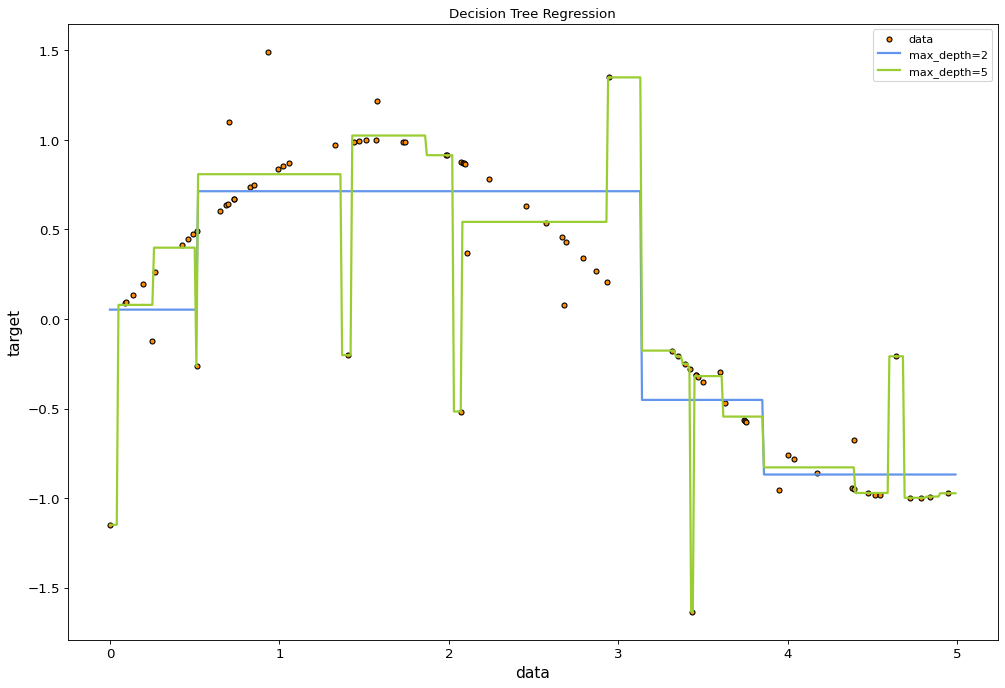

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(15,10),dpi=80)
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()